# Blackjack

## Setup

In [1]:
import gymnasium as gym

from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv

from bettermdptools.utils.decorators import add_to
from bettermdptools.utils.callbacks import MyCallbacks
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})

In [2]:
"""
Reference - https://www.gymlibrary.dev/environments/toy_text/blackjack/
Action Space - Discrete(2)
Observation Space - Tuple(Discrete(32), Discrete(11), Discrete(2))
Import - gym.make("Blackjack-v1")

Reward:
win game: +1
lose game: -1
draw game: 0
"""

'\nReference - https://www.gymlibrary.dev/environments/toy_text/blackjack/\nAction Space - Discrete(2)\nObservation Space - Tuple(Discrete(32), Discrete(11), Discrete(2))\nImport - gym.make("Blackjack-v1")\n\nReward:\nwin game: +1\nlose game: -1\ndraw game: 0\n'

## Value Iteration

runtime = 0.02 seconds
V: (290,)
V_track: (1000, 290)
pi {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 0, 131:

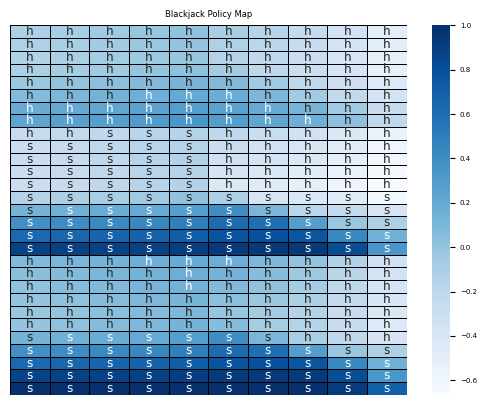

Test Score - VI:  0.09


/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [3]:
"""
PARAMETERS:
gamma {float}: Discount factor
n_iters {int}: Number of iterations
theta {float}: Convergence criterion for value iteration. State values are considered to be converged when the maximum difference between new and previous state values is less than theta. Stops at n_iters or theta convergence - whichever comes first.

RETURNS:
V {numpy array}, shape(possible states): State values array
V_track {numpy array}, shape(n_episodes, nS): Log of V(s) for each iteration
pi {lambda}, input state value, output action value: Policy mapping states to actions.
"""

base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration(theta=1e-20)

print("V:", V.shape)
print("V_track:", V_track.shape)
print("pi", pi)

#create actions dictionary and set map size
blackjack_actions = {0: "s", 1: "h"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

#plot policy map
title="Blackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print("Test Score - VI: ", np.mean(test_scores))

V Iterations Number:  15
V Iterations:  [0.         0.10074743 0.08044078 0.0796205  0.07977269 0.07978986
 0.07979392 0.0797943  0.07979431 0.07979431 0.07979431 0.07979431
 0.07979431 0.07979431 0.07979431]


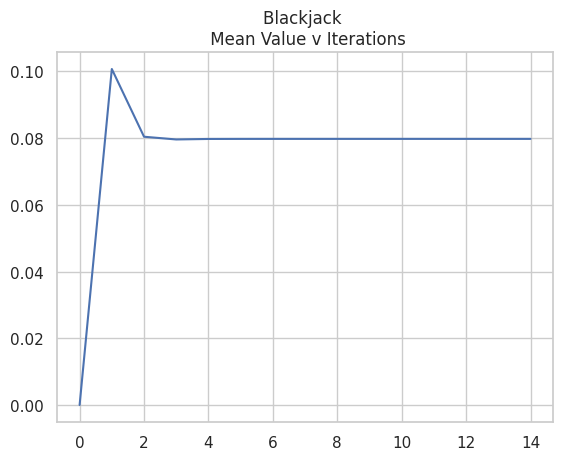

In [44]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
print("V Iterations Number: ", len(max_value_per_iter))
print("V Iterations: ", max_value_per_iter)
Plots.v_iters_plot(max_value_per_iter, "Blackjack \n Mean Value v Iterations")

## Policy Iteration

runtime = 0.03 seconds


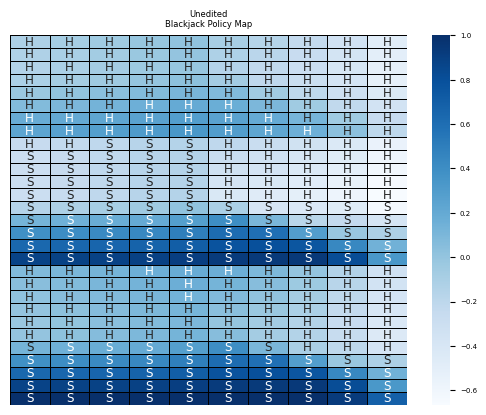

[ 0.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  0. -1. -1.  1.  1. -1.
 -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.
  0.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1.  0. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1.  0. -1.  0. -1.
  1. -1. -1. -1.  0. -1.  1.  0.  1.  1.]
-0.25


/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [4]:
"""
PARAMETERS:

gamma {float}: Discount factor
n_iters {int}: Number of iterations
theta {float}: Convergence criterion for policy evaluation. State values are considered to be converged when the maximum difference between new and previous state values is less than theta.

RETURNS:
V {numpy array}, shape(possible states): State values array
V_track {numpy array}, shape(n_episodes, nS): Log of V(s) for each iteration
pi {lambda}, input state value, output action value: Policy mapping states to actions.
"""
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# run PI
V, V_track, pi = Planner(blackjack.P).policy_iteration(theta=1e-20)

#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(test_scores)
print(np.mean(test_scores))

V Iterations number:  [ 0.         -0.28918731 -0.01545079  0.07873771  0.07979431]


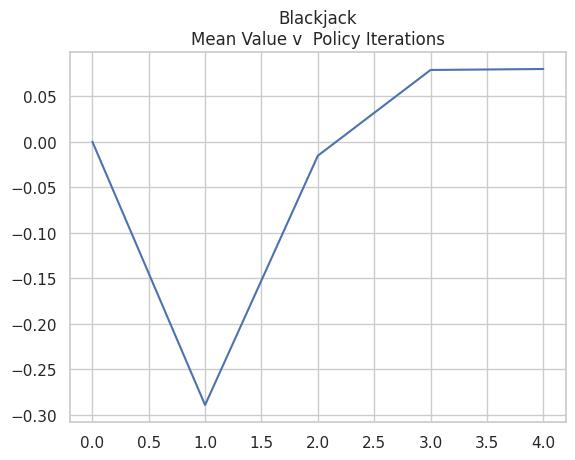

In [5]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
print("V Iterations number: ", max_value_per_iter)
Plots.v_iters_plot(max_value_per_iter, "Blackjack\nMean Value v  Policy Iterations")

In [49]:
# Q-learning
#Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=100000)
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=100000)

runtime = 8.95 seconds


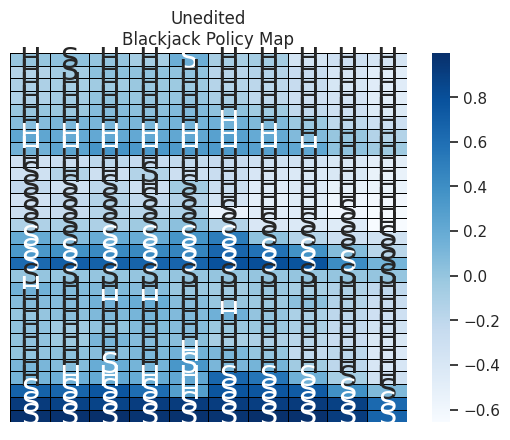

[ 1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.
 -1.  0. -1. -1.  1. -1.  0. -1. -1.  1.  1.  0.  1.  1. -1. -1. -1.  1.
  0. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1. -1.  1.  0.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1.  0.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  0. -1. -1.
 -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.]
-0.11


In [50]:
#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(test_scores)
print(np.mean(test_scores))

In [51]:
#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(test_scores)
print(np.mean(test_scores))

[-1.  1. -1. -1.  1. -1.  1. -1. -1.  0. -1. -1.  1.  0.  1. -1.  0. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1.  1. -1. -1.  1.  0.  1. -1. -1.  1. -1. -1.  1.  0.  0.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1.  0.  1. -1.  1. -1.  0. -1.  1.  1.  1.
 -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.]
-0.2


In [52]:
avg_rewards = []
for i in range(0, 100000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))

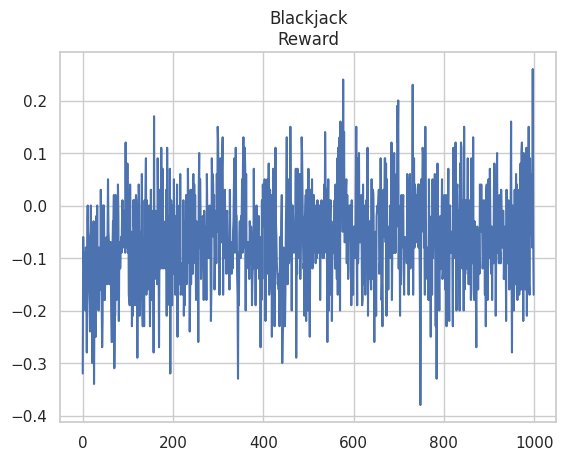

In [54]:
Plots.v_iters_plot(avg_rewards, "Blackjack\nReward")

In [6]:
# Q-learning
#Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=100000)
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000)

runtime = 0.94 seconds


# Frozen Lake

## Setup

In [55]:
import gymnasium as gym

from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv

from bettermdptools.utils.decorators import add_to
from bettermdptools.utils.callbacks import MyCallbacks
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.grid_search import GridSearch

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Value Iteration

In [56]:
##
## Value Iteration
##

"""
function bettermdptools.algorithms.planner.Planner.value_iteration(self, 
	gamma=1.0, n_iters=1000, theta=1e-10) ->  V, V_track, pi
    
V {numpy array}, shape(possible states): State values array
V_track {numpy array}, shape(n_episodes, nS): Log of V(s) for each iteration
pi {lambda}, input state value, output action value: Policy mapping states to actions.
"""

frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
#V, V_track, pi = Planner(cliff_walk.P).value_iteration(n_iters=5000)
V, V_track, pi = Planner(frozen_lake.P).value_iteration()

print(V.shape)
print(V_track.shape)
print(pi)

runtime = 0.13 seconds
(16,)
(1000, 16)
{0: 0, 1: 3, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 1, 10: 0, 11: 0, 12: 0, 13: 2, 14: 1, 15: 0}


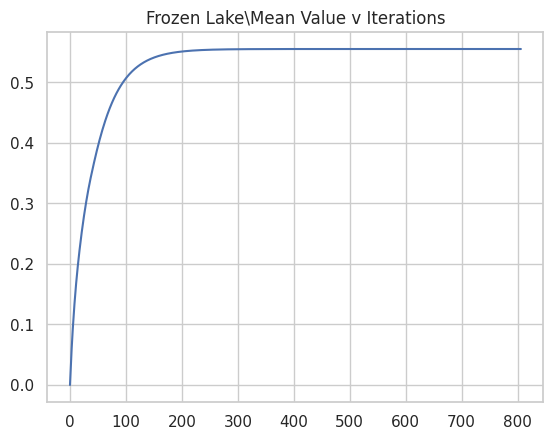

Number of iteration:  807
[0.         0.02083333 0.04166667 0.06018519 0.07716049 0.09284979
 0.10742455 0.12105624 0.13384012 0.14587144 0.1572116  0.16791951
 0.17805046 0.18768386 0.19686637 0.20567251 0.2141548  0.22234178
 0.23025639 0.23791669 0.24533724 0.25253005 0.25950515 0.26627114
 0.27283553 0.27920507 0.28538589 0.2913837  0.29720387 0.30285151
 0.30833152 0.31364866 0.31880752 0.32381257 0.32866818 0.33337861
 0.33794802 0.34238046 0.34670222 0.35097673 0.35521822 0.35941452
 0.36356157 0.36765573 0.37169444 0.37567558 0.37959748 0.3834587
 0.38725809 0.39099469 0.39466776 0.39827673 0.40182118 0.40530089
 0.40871572 0.41206571 0.41535099 0.41857179 0.42172847 0.42482143
 0.42785119 0.43081832 0.43372345 0.43656728 0.43935054 0.44207401
 0.44473851 0.44734488 0.44989401 0.45238678 0.45482412 0.45720694
 0.45953621 0.46181285 0.46403783 0.46621211 0.46833664 0.47041238
 0.47244029 0.47442132 0.47635642 0.47824652 0.48009255 0.48189544
 0.48365609 0.4853754  0.48705426 0.4

In [66]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake\Mean Value v Iterations")
print("Number of iteration: ", len(max_value_per_iter))
print(max_value_per_iter)

In [67]:
"""
TestEnv Return:
    test_scores {numpy array}:
            Log of rewards from each episode.
"""

#episode_rewards = TestEnv.test_env(env=frozen_lake, render=False, user_input=False, pi=pi)
test_scores = TestEnv.test_env(env=frozen_lake, render=False, user_input=False, pi=pi)
print("Value ieteration test score: ", np.mean(test_scores))

Value ieteration test score:  0.9


/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


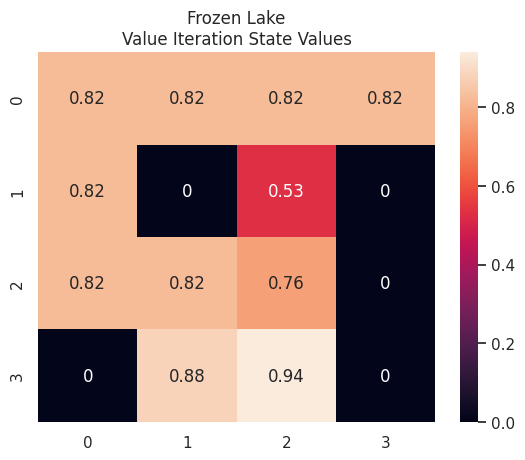

In [68]:
size=(4,4)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

## Policy Iteration

In [69]:
##
## Policy Iteration
##

"""
function bettermdptools.algorithms.planner.Planner.policy_iteration(self, 
	gamma=1.0, n_iters=1000, theta=1e-10) ->  V, V_track, pi
    
gamma {float}: Discount factor
n_iters {int}: Number of iterations
theta {float}: Convergence criterion for policy evaluation. State values are considered to be converged when the maximum difference between new and previous state values is less than theta.
"""
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
V_p, V_track_p, pi_p = Planner(frozen_lake.P).policy_iteration()

print(V_p.shape)
print(V_track_p.shape)
print(V_track_p[10])
print(pi_p)
print("---------------")
print(V_track_p)

runtime = 0.06 seconds
(16,)
(50, 16)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{0: 0, 1: 3, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 1, 10: 0, 11: 0, 12: 0, 13: 2, 14: 1, 15: 0}
---------------
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.2        0.4        0.        ]
 [0.         0.         0.05982906 0.02991453 0.         0.
  0.11965812 0.         0.         0.11111111 0.2991453  0.
  0.         0.33333333 0.66666667 0.        ]
 [0.23076923 0.16239316 0.25641026 0.25641026 0.23076923 0.
  0.25641026 0.         0.23076923 0.46153846 0.51282051 0.
  0.         0.64102564 0.82051282 0.        ]
 [0.75       0.54166666 0.33333333 0.33333333 0.75       0.
  0.33333333 0.         0.75       0.75       0.66666667 0.
  0. 

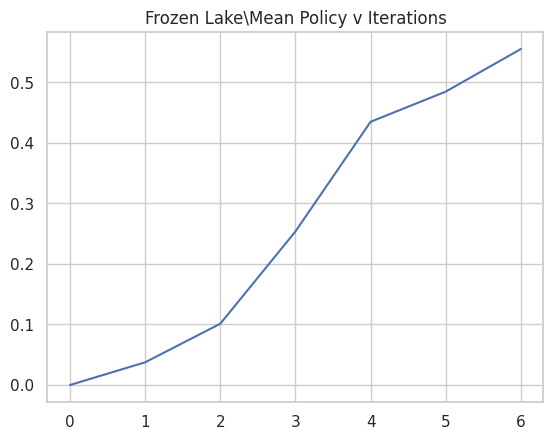

[0.         0.0375     0.10122863 0.25373932 0.43489583 0.4847561
 0.55514706]


In [70]:
max_value_per_iter = np.trim_zeros(np.mean(V_track_p, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake\Mean Policy v Iterations")
print(max_value_per_iter)

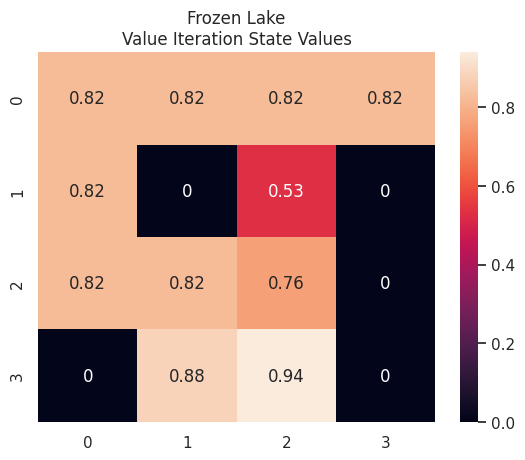

In [73]:
size=(4,4)
Plots.values_heat_map(V_p, "Frozen Lake\nValue Iteration State Values", size)

## Q Learning

In [116]:
"""
        Parameters
        ----------------------------
        nS {int}:
            Number of states

        nA {int}:
            Number of available actions

        convert_state_obs {lambda}:
            Converts state into an integer

        gamma {float}, default = 0.99:
            Discount factor

        init_alpha {float}, default = 0.5:
            Learning rate

        min_alpha {float}, default = 0.01:
            Minimum learning rate

        alpha_decay_ratio {float}, default = 0.5:
            Decay schedule of learing rate for future iterations

        init_epsilon {float}, default = 1.0:
            Initial epsilon value for epsilon greedy strategy.
            Chooses max(Q) over available actions with probability 1-epsilon.

        min_epsilon {float}, default = 0.1:
            Minimum epsilon. Used to balance exploration in later stages.

        epsilon_decay_ratio {float}, default = 0.9:
            Decay schedule of epsilon for future iterations

        n_episodes {int}, default = 10000:
            Number of episodes for the agent
"""
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)

runtime = 2.95 seconds


In [117]:
print(Q.shape)
print(V.shape)
print(Q_track.shape)

(16, 4)
(16,)
(10000, 16, 4)


In [118]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

0.74


In [119]:
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))

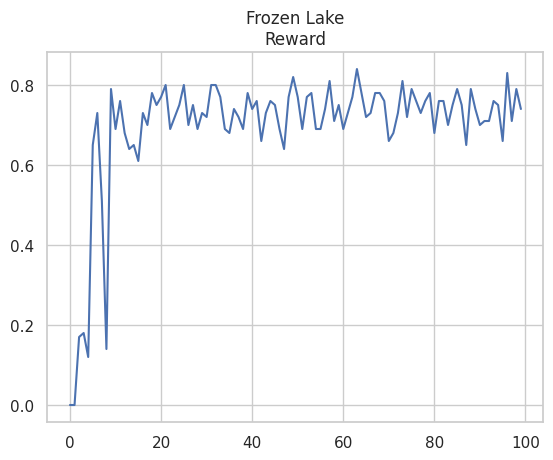

In [120]:
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")

In [94]:
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)

gamma = [.99]
epsilon_decay=[.9]
iters = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
GridSearch.q_learning_grid_search(frozen_lake, gamma, epsilon_decay, iters)

running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 500


runtime = 0.10 seconds
Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 1000


runtime = 0.19 seconds
Avg. episode reward:  0.02
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 1500


runtime = 0.26 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 2000


runtime = 0.53 seconds
Avg. episode reward:  0.54
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 2500


runtime = 0.82 seconds
Avg. episode reward:  0.67
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 3000


runtime = 0.85 seconds
Avg. episode reward:  0.54
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 3500


runtime = 0.85 seconds
Avg. episode reward:  0.56
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 4000


runtime = 1.27 seconds
Avg. episode reward:  0.72
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 4500


runtime = 1.31 seconds
Avg. episode reward:  0.83
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 5000


runtime = 1.55 seconds
Avg. episode reward:  0.69
###################


  0%|                                                                                                                                                | 0/10000 [00:00<?, ?it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 22%|█████████████████████████████▎                                                                                                     | 2235/10000 [00:00<00:01, 5989.54it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 3.20 seconds
0.71


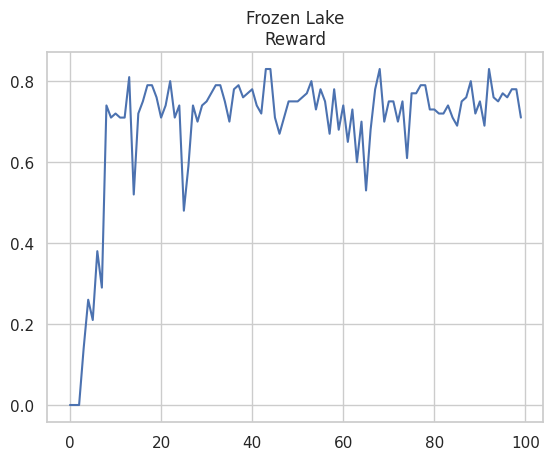

In [98]:
"""
        Parameters
        ----------------------------
        nS {int}:
            Number of states

        nA {int}:
            Number of available actions

        convert_state_obs {lambda}:
            Converts state into an integer

        gamma {float}, default = 0.99:
            Discount factor

        init_alpha {float}, default = 0.5:
            Learning rate

        min_alpha {float}, default = 0.01:
            Minimum learning rate

        alpha_decay_ratio {float}, default = 0.5:
            Decay schedule of learing rate for future iterations

        init_epsilon {float}, default = 1.0:
            Initial epsilon value for epsilon greedy strategy.
            Chooses max(Q) over available actions with probability 1-epsilon.

        min_epsilon {float}, default = 0.1:
            Minimum epsilon. Used to balance exploration in later stages.

        epsilon_decay_ratio {float}, default = 0.9:
            Decay schedule of epsilon for future iterations

        n_episodes {int}, default = 10000:
            Number of episodes for the agent
"""

frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")

  0%|                                                                                                                                                | 0/10000 [00:00<?, ?it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 30%|███████████████████████████████████████▏                                                                                           | 2995/10000 [00:00<00:01, 5672.30it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 2.66 seconds
0.77


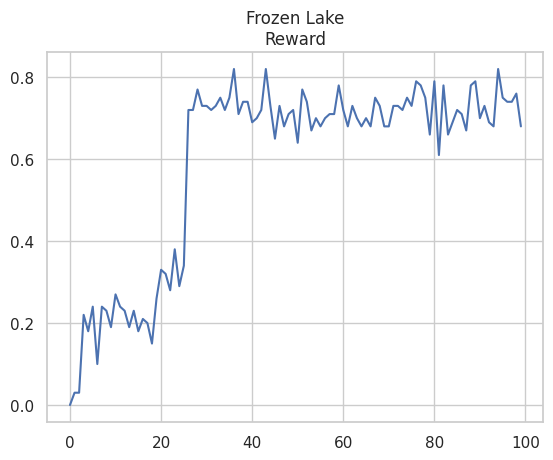

In [100]:
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, init_alpha=0.1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")

  0%|                                                                                                                                                | 0/10000 [00:00<?, ?it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 23%|█████████████████████████████▊                                                                                                     | 2280/10000 [00:00<00:01, 4391.27it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 3.12 seconds
0.73


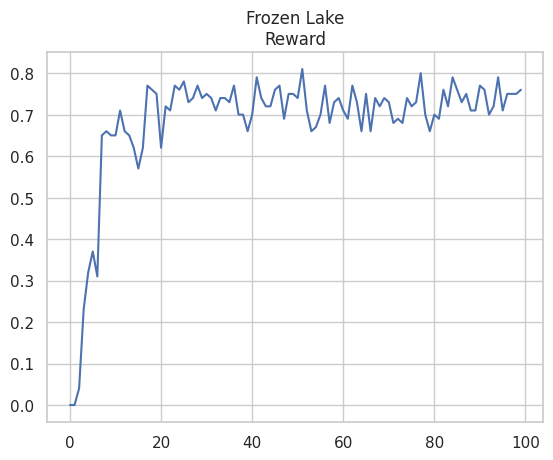

In [121]:
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, init_alpha=0.2)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")

  0%|                                                                                                                                                | 0/10000 [00:00<?, ?it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 21%|███████████████████████████▍                                                                                                       | 2098/10000 [00:00<00:01, 5978.03it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 2.67 seconds
0.83


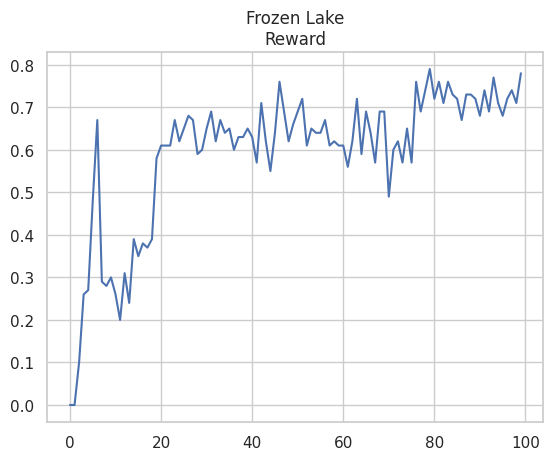

In [104]:
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, init_alpha=0.1, epsilon_decay_ratio=0.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")

  0%|                                                                                                                                                | 0/10000 [00:00<?, ?it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 42%|███████████████████████████████████████████████████████▌                                                                           | 4246/10000 [00:00<00:00, 5762.48it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 2.18 seconds
0.47


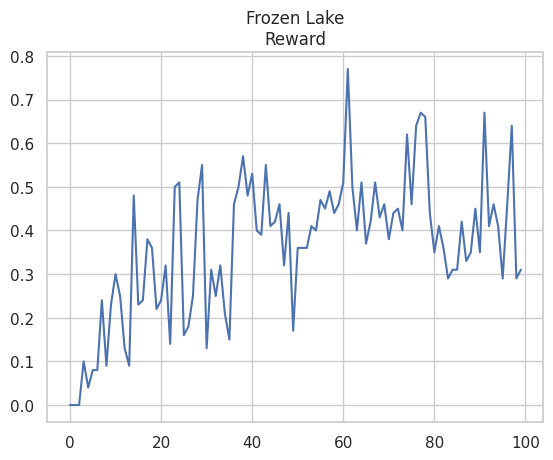

In [127]:
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=0.8)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")

  0%|                                                                                                                                                | 0/10000 [00:00<?, ?it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 23%|█████████████████████████████▉                                                                                                     | 2281/10000 [00:00<00:01, 5180.03it/s]/home/ms/miniconda3/envs/cs7641/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 2.73 seconds
0.54


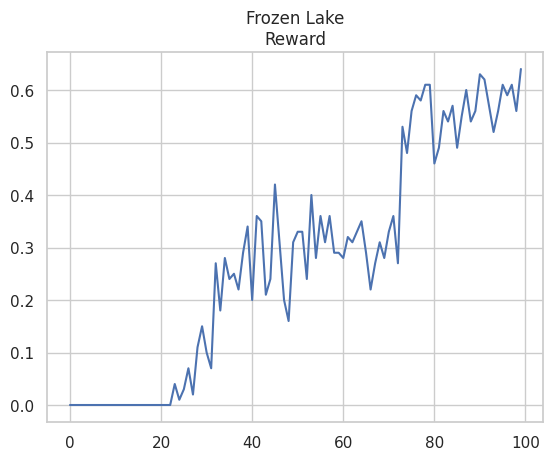

In [134]:
frozen_lake = gym.make('FrozenLake-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, init_epsilon=0.2)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))
avg_rewards = []
for i in range(0, 10000, 100):
    test_pi = {index: value for index, value in enumerate(pi_track[i])}
    #test policy
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=test_pi, user_input=False)
    avg_rewards.append(np.mean(test_scores))
Plots.v_iters_plot(avg_rewards, "Frozen Lake\nReward")